# Lab-6 Transfer Learning with VGG16

In [40]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pickle

In [41]:
label = ['rock', 'paper', 'scissors']

In [42]:
main_dir = "rps_archive"
rock = []
paper = []
scissors = []
labels = []

for filename in os.listdir(main_dir+"/rock"):
    rock.append("/rock/"+filename)
    labels.append("rock")
        
for filename in os.listdir(main_dir+"/paper"):
    paper.append("/paper/"+filename)
    labels.append("paper")

for filename in os.listdir(main_dir+"/scissors"):
    scissors.append("/scissors/"+filename)
    labels.append("scissors")

data = rock+paper+scissors
data = pd.DataFrame(data, columns=["file"])
data["label"] = labels
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,file,label
0,/scissors/oxU5O3n839QvrOGu.png,scissors
1,/scissors/fYsFOMTEQ0VIy1Ma.png,scissors
2,/paper/tFuz8mF78pYT6hKS.png,paper
3,/rock/YIHmMbsN487PuNaH.png,rock
4,/paper/a45DJKHJdnCFhX5X.png,paper


In [43]:
def path_to_array(path):
    img = load_img(main_dir+"/"+path)
    img = img_to_array(img)
    img = tf.image.rot90(img, k=3)
    return img

In [44]:
X = []
for i in range(len(data)):
    img = path_to_array(data["file"][i])
    X.append(img)

In [45]:
y = data["label"]
for i in range(len(y)):
    if y[i] == "rock":
        y[i] = 0
    elif y[i] == "paper":
        y[i] = 1
    else:
        y[i] = 2
y = tf.keras.utils.to_categorical(y, num_classes=3)

In [46]:
X = np.array(X)

In [47]:
X.shape, y.shape

((2188, 300, 200, 3), (2188, 3))

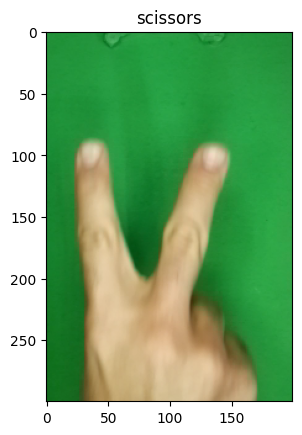

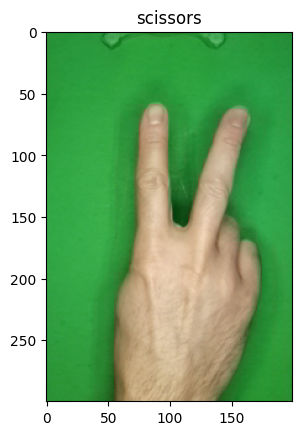

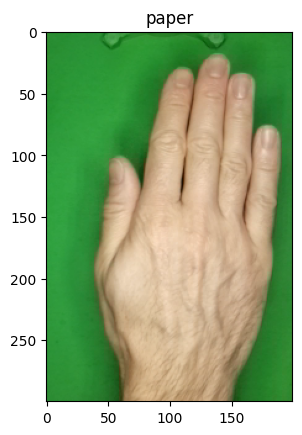

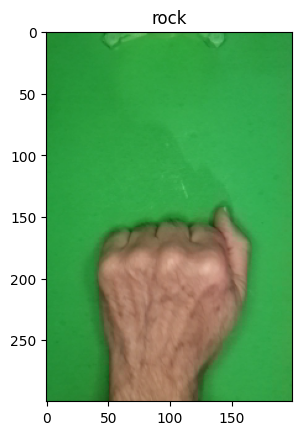

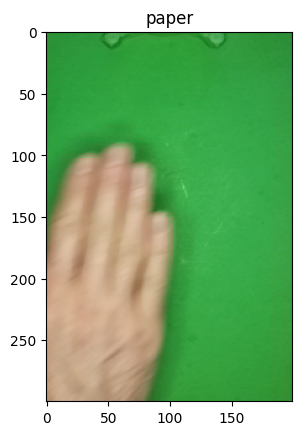

In [48]:
for i in range(5):
    plt.title(label[y[i].argmax()])
    plt.imshow(X[i]/255)
    plt.show()

In [49]:
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

train_gen = data_gen.flow(X, y, subset="training")

In [50]:
model_res = VGG16(include_top=False, weights=None, input_shape=(300, 200, 3))

In [51]:
model_res.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 50, 128)       0     

In [52]:
model = Sequential()
model.add(model_res)
model.add(Flatten())
model.add(Dense(1028, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [53]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 9, 6, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 27648)             0         
                                                                 
 dense_8 (Dense)             (None, 1028)              28423172  
                                                                 
 dropout_2 (Dropout)         (None, 1028)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               526848    
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 dense_11 (Dense)            (None, 3)                

In [55]:
X.shape

(2188, 300, 200, 3)

In [56]:
model.fit(train_gen, epochs=2, batch_size=32)

Epoch 1/2
55/55 [==============================] - 582s 11s/step - loss: 9.7419 - accuracy: 0.3352
Epoch 2/2
55/55 [==============================] - 609s 11s/step - loss: 1.0995 - accuracy: 0.3609


In [57]:
model.evaluate(train_gen)

55/55 [==============================] - 194s 4s/step - loss: 1.0973 - accuracy: 0.3564


[1.0973001718521118, 0.3563677966594696]

: 